**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# I. Perkenalan

## 1.1. Perkenalan

### Graded Challenge 2 - P1

- Name   : Nabila Edelliana Khairunnisa
- Batch  : 011

### Description
Project tugas ini bertujuan untuk mendalami lebih lanjut dasar-dasar data science khususnya konsep classification terutama Logistic Regression dan SVM.

Data yang di olah merupakan data jasa transportasi .
### Objective
1. Mampu memperoleh data menggunakan BigQuery
2. Mampu memahami konsep Classification dengan Logistic Regression dan SVM
3. Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
4. Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

### Problem Statement

1. Model manakah yang lebih baik dalam memprediksi income? Logistic Regression atau SVM?
2. Bagaimana hasil metrics evaluasi terhadap model?
3. Bagaimana pengaruh hyperparameter terhadap hasil pemodelan?

## 1.2. Query dari BigQuery

SELECT

age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket

FROM `bigquery-public-data.ml_datasets.census_adult_income`

WHERE workclass NOT LIKE '%?%' AND hours_per_week < 100

LIMIT 21989;

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

# II. Import Pustaka yang Dibutuhkan

In [1]:
# Library EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Library pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

# Library Model Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Library Evaluasi Model
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

# Library Saving dan Open Model
import pickle

# III. Data Loading

In [2]:
data = pd.read_csv('census_adult_income.csv')
# Menampilkan head data
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K


In [3]:
# Menampilkan tail data
data.tail()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
21984,47,Private,9th,5,Divorced,Other-service,Not-in-family,White,Female,0,1719,30,United-States,<=50K
21985,24,Private,9th,5,Never-married,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K
21986,64,State-gov,9th,5,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
21987,31,Private,9th,5,Never-married,Sales,Not-in-family,White,Male,0,0,43,United-States,>50K
21988,31,Private,9th,5,Never-married,Craft-repair,Not-in-family,Other,Male,0,0,45,United-States,<=50K


In [4]:
# Membuat salinan data untuk backup
data_copy = data.copy()

In [5]:
# mengecek ukuran dataset
data.shape

(21989, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21989 entries, 0 to 21988
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             21989 non-null  int64 
 1   workclass       21989 non-null  object
 2   education       21989 non-null  object
 3   education_num   21989 non-null  int64 
 4   marital_status  21989 non-null  object
 5   occupation      21989 non-null  object
 6   relationship    21989 non-null  object
 7   race            21989 non-null  object
 8   sex             21989 non-null  object
 9   capital_gain    21989 non-null  int64 
 10  capital_loss    21989 non-null  int64 
 11  hours_per_week  21989 non-null  int64 
 12  native_country  21989 non-null  object
 13  income_bracket  21989 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.3+ MB


# IV. Exploratory Data Analysis (EDA)

## 4.1. Melihat missing value

In [7]:
# Melihat data yang memiliki missing value
data.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

In [8]:
data['occupation'].unique()

array([' Other-service', ' Exec-managerial', ' Machine-op-inspct',
       ' Tech-support', ' Adm-clerical', ' Farming-fishing',
       ' Priv-house-serv', ' Sales', ' Protective-serv',
       ' Transport-moving', ' Handlers-cleaners', ' Craft-repair',
       ' Prof-specialty', ' ?', ' Armed-Forces'], dtype=object)

terlihat sepertinya data tidak memiliki missing values. Namun setelah ditelusuri unique nya, ada data ' ?' yang merupakan missing value. Selanjutnya saya akan mengganti data tersebut menjadi nan.

In [9]:
# Remove the ? sign and assign those as nan values
data['native_country'] = data['native_country'].replace(' ?' , np.nan )
data['age'] = data['age'].replace(' ?' , np.nan )
data['workclass'] = data['workclass'].replace(' ?' , np.nan )
data['education'] = data['education'].replace(' ?' , np.nan )
data['education_num'] = data['education_num'].replace(' ?' , np.nan )
data['marital_status'] = data['marital_status'].replace(' ?' , np.nan )
data['occupation'] = data['occupation'].replace(' ?' , np.nan )
data['relationship'] = data['relationship'].replace(' ?' , np.nan )
data['race'] = data['race'].replace(' ?' , np.nan )
data['sex'] = data['sex'].replace(' ?' , np.nan )
data['capital_gain'] = data['capital_gain'].replace(' ?' , np.nan )
data['capital_loss'] = data['capital_loss'].replace(' ?' , np.nan )
data['hours_per_week'] = data['hours_per_week'].replace(' ?' , np.nan )

In [10]:
data['occupation'].unique()

array([' Other-service', ' Exec-managerial', ' Machine-op-inspct',
       ' Tech-support', ' Adm-clerical', ' Farming-fishing',
       ' Priv-house-serv', ' Sales', ' Protective-serv',
       ' Transport-moving', ' Handlers-cleaners', ' Craft-repair',
       ' Prof-specialty', nan, ' Armed-Forces'], dtype=object)

sudah berganti jadi nan values

In [11]:
# Melihat missing value
data.isnull().sum()

age                 0
workclass           0
education           0
education_num       0
marital_status      0
occupation          6
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    390
income_bracket      0
dtype: int64

setelah dilakukan pendefinisian missing value, ternyata data tersebut memiliki missing values di occupation dan native_country.

## 4.2. Drop kolom yang tidak diperlukan

In [12]:
# menyalin data lagi untuk berjaga-jaga
df_new = data.copy()
df_new.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K


karena `education_num` memiliki makna yang sama dengan `education`, maka akan saya drop.

In [13]:
df_new.drop(columns='education_num', inplace=True)
df_new.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K


## 4.3. Melihat korelasi setiap kolom dengan target (income)

korelasi di setiap kolom akan dilihat dari :
1. Distribusi data kolom tersebut dengan kolom target.
2. Chi-Square test.
    dilakukan dengan hypothesis testing dengan rules :
    - H0: tidak ada korelasi antara kolom dan kolom target
    - H1: ada korelasi antara kolom dan kolom target
    - P-Val < alpha (0.05) --> berhasil menolak H0
    - P-Val >= alpha (0.05) --> gagal menolak H0 --> kemungkinan ada korelasi --> masukkan kolom ke pemodelan

### 4.3.1. Melihat korelasi income dan age

grafik korelasi

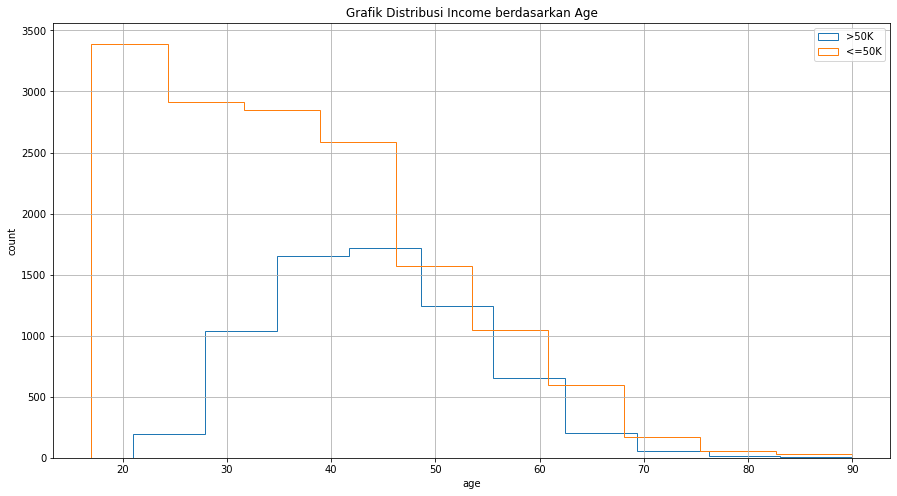

In [14]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['income_bracket'] == ' >50K'].age,
         histtype='step', label='>50K')
axes.hist(df_new[df_new['income_bracket'] == ' <=50K'].age,
         histtype='step', label='<=50K')
axes.set_title('Grafik Distribusi Income berdasarkan Age')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('age')
axes.grid()

- sebagian besar data ini adalah orang-orang di usia lebih muda yaitu antara 20-40 tahun.
- orang-orang dengan income >50K lebih banyak di usia paruh baya antara usia 35-50 tahun
- orang-orang dengan income <=50K lebih banyak di usia muda yaitu 20-30 tahun.
- jika seseorang memiliki usia 20-30 tahun, kemungkinan income nya <=50K akan lebih besar.

Chi-Square Age

In [15]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['income_bracket'],
                            df_new['age'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['income_bracket'].unique()
columns = data['age'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 2735.854171528943  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 2735.854171528943  and critical value is: 90.53122543488065
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara income dengan age. conclusion : age dimasukkan sebagai fitur ke model ML.

### 4.3.2. Melihat korelasi income dan education

grafik korelasi

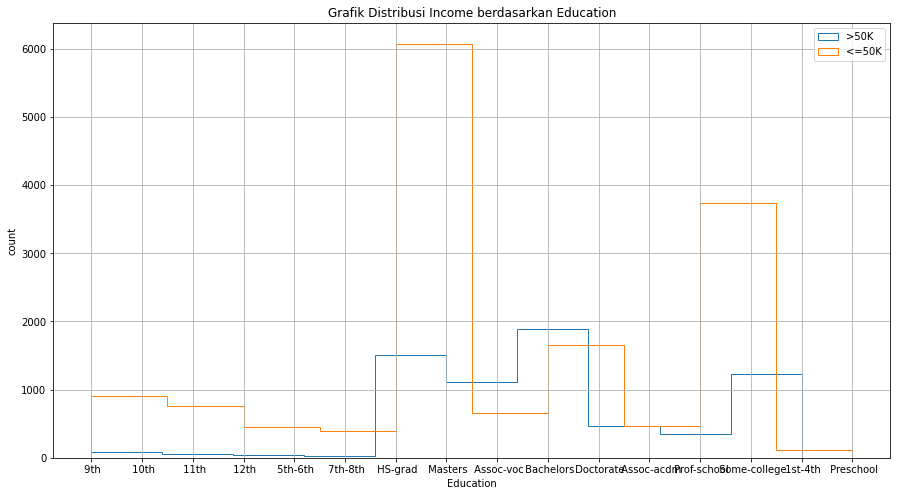

In [16]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['income_bracket'] == ' >50K'].education,
         histtype='step', label='>50K')
axes.hist(df_new[df_new['income_bracket'] == ' <=50K'].education,
         histtype='step', label='<=50K')
axes.set_title('Grafik Distribusi Income berdasarkan Education')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('Education')
axes.grid()

Berdasarkan grafik:
- sebagian besar data ini adalah orang-orang dengan latar pendidikan HS-grad, Some-college, Assoc-voc, Assoc-acdm, dan Bachelors.
- orang-orang dengan income >50K dan <=50K memiliki sebaran pendidikan yang hampir sama.
- jika seseorang memiliki pendidikan 'Assoc-acdm', maka kemungkinan income nya >50K akan lebih besar.

Chi-Square education

In [17]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['income_bracket'],
                            df_new['education'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['income_bracket'].unique()
columns = data['education'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 3681.8761333638454  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 3681.8761333638454  and critical value is: 24.995790139728616
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara income dengan education. conclusion : education dimasukkan sebagai fitur ke model ML

### 4.3.3. Melihat korelasi income dan capital_gain

grafik korelasi

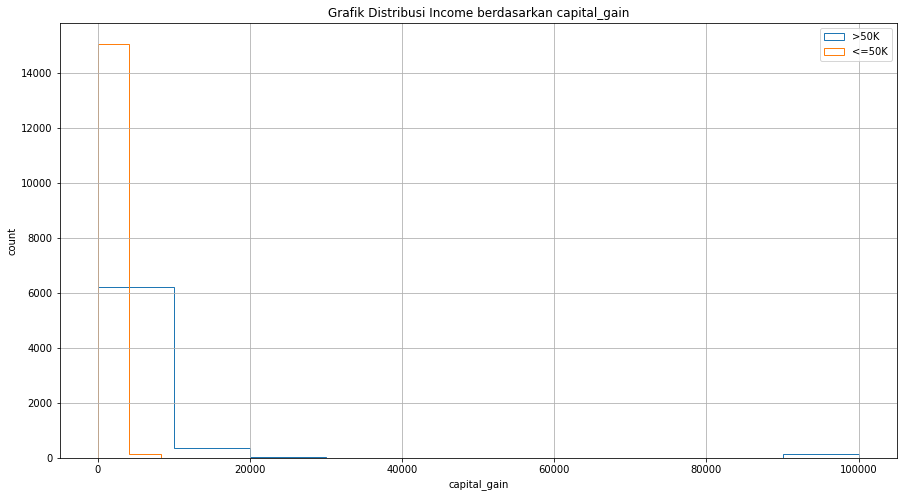

In [18]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['income_bracket'] == ' >50K'].capital_gain,
         histtype='step', label='>50K')
axes.hist(df_new[df_new['income_bracket'] == ' <=50K'].capital_gain,
         histtype='step', label='<=50K')
axes.set_title('Grafik Distribusi Income berdasarkan capital_gain')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('capital_gain')
axes.grid()

Berdasarkan grafik:
- sebagian besar data ini adalah orang-orang yang memiliki capital gain 0.
- orang-orang dengan capital gain > 0 memiliki kemungkinan income >50K lebih tinggi.
- capital gain > 0 kurang bisa menjelaskan korelasinya dengan kelas income.

Chi-Square capital_gain

In [19]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['income_bracket'],
                            df_new['capital_gain'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['income_bracket'].unique()
columns = data['capital_gain'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 3457.4670772607196  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 3457.4670772607196  and critical value is: 127.68930826333825
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara income dengan capital gain. Akan tetapi kolom ini kurang baik dalam menunjukkan bukti korelasinya sehingga tidak cocok untuk dijadikan fitur prediksi. conclusion : capital gain tidak dimasukkan sebagai fitur ke model ML

### 4.3.4. Melihat korelasi income dan capital_loss

grafik korelasi

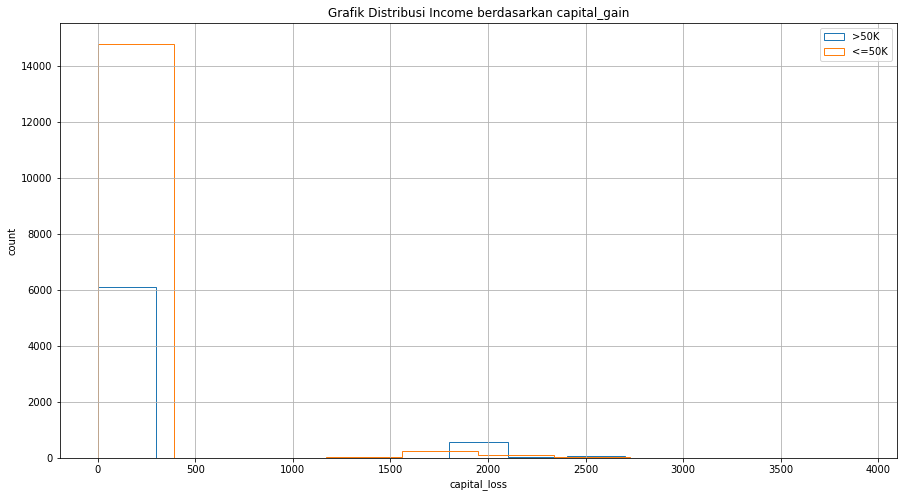

In [20]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['income_bracket'] == ' >50K'].capital_loss,
         histtype='step', label='>50K')
axes.hist(df_new[df_new['income_bracket'] == ' <=50K'].capital_loss,
         histtype='step', label='<=50K')
axes.set_title('Grafik Distribusi Income berdasarkan capital_gain')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('capital_loss')
axes.grid()

Berdasarkan grafik:
- sebagian besar data ini adalah orang-orang yang memiliki capital loss 0.
- capital loss terbanyak untuk orang-orang dengan capital loss > 0 dan income >50K adalah sebesar 2000.
- capital loss terbanyak untuk orang-orang dengan capital loss > 0 dan income <=50K adalah sebesar 1500-2000.
- capital gain > 0 kurang bisa menjelaskan korelasinya dengan kelas income.

Chi-Square capital_loss  

In [21]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['income_bracket'],
                            df_new['capital_loss'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['income_bracket'].unique()
columns = data['capital_loss'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1620.2536276167875  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1620.2536276167875  and critical value is: 101.87947396543588
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara income dengan capital loss. Akan tetapi kolom ini kurang baik dalam menunjukkan bukti korelasinya sehingga tidak cocok untuk dijadikan fitur prediksi. conclusion : capital loss tidak dimasukkan sebagai fitur ke model ML

### 4.3.5. Melihat korelasi income dan hours_per_week

grafik korelasi

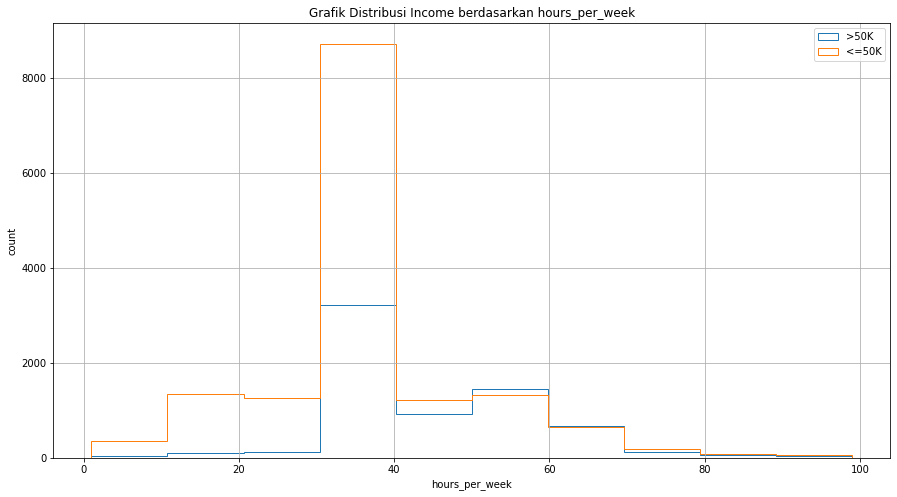

In [22]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['income_bracket'] == ' >50K'].hours_per_week,
         histtype='step', label='>50K')
axes.hist(df_new[df_new['income_bracket'] == ' <=50K'].hours_per_week,
         histtype='step', label='<=50K')
axes.set_title('Grafik Distribusi Income berdasarkan hours_per_week')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('hours_per_week')
axes.grid()

Berdasarkan grafik:
- sebagian besar data ini adalah orang-orang yang memiliki hours per week 35-40 jam.
- orang-orang dengan hours per week yang kecil (0-30 jam) lebih banyak dimiliki oaleh orang dengan income <=50K. Hal ini wajar karena mungkin bayaran yang tinggi disesuaikan dengan banyaknya jam kerja juga.

Chi-Square hours_per_week

In [23]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['income_bracket'],
                            df_new['hours_per_week'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['income_bracket'].unique()
columns = data['hours_per_week'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 2040.3368412310394  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 2040.3368412310394  and critical value is: 114.26786767719355
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara income dengan hours per week. conclusion : hours per week dimasukkan sebagai fitur ke model ML

### 4.3.6. Melihat korelasi income dan workclass

grafik korelasi

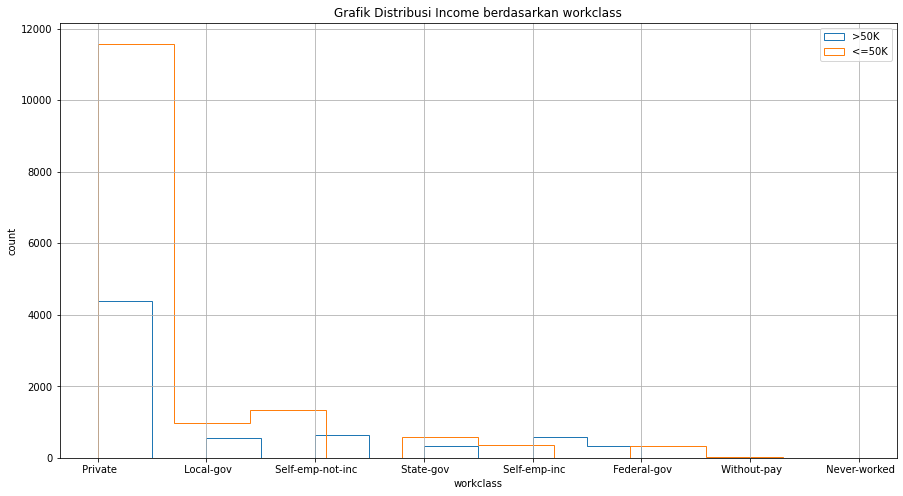

In [24]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['income_bracket'] == ' >50K'].workclass,
         histtype='step', label='>50K')
axes.hist(df_new[df_new['income_bracket'] == ' <=50K'].workclass,
         histtype='step', label='<=50K')
axes.set_title('Grafik Distribusi Income berdasarkan workclass')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('workclass')
axes.grid()

Berdasarkan grafik:
- sebagian besar data ini adalah orang-orang yang memiliki workclass Private.
- di setiap workclass, terdapat distribusi yang hampir sama antara jumlah orang dengan income >50K dan <=50K dan karena itu kurang bisa merepresentasikan hubungannya yang membedakan antara kelas income <= 50K dan >50K.

Chi-Square workclass

In [25]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['income_bracket'],
                            df_new['workclass'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['income_bracket'].unique()
columns = data['workclass'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 629.7619412961654  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 629.7619412961654  and critical value is: 14.067140449340169
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara income dengan workclass. Akan tetapi, berdasarkan grafik, tidak ada hubungan khusus antara workclass dengan income yang mendefinisikan kelas income. conclusion : workclass tidak dimasukkan sebagai fitur ke model ML

### 4.3.7. Melihat korelasi income dan marital_status

grafik korelasi

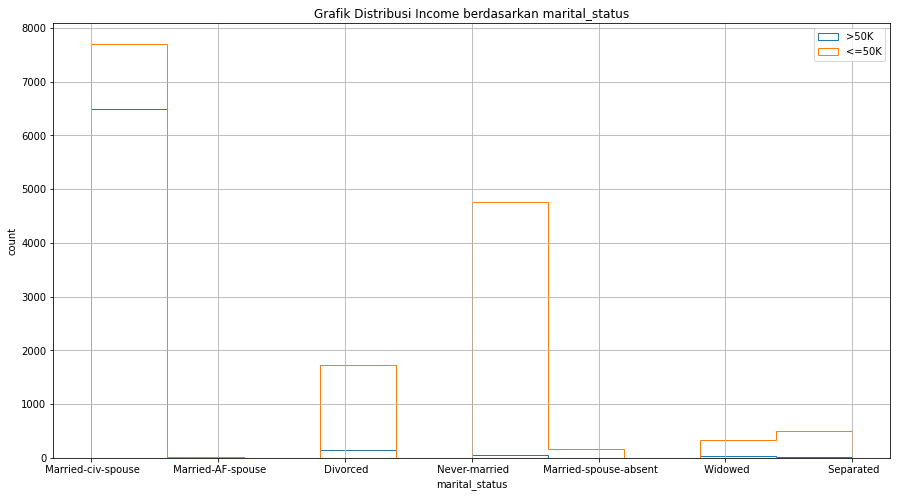

In [26]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['income_bracket'] == ' >50K'].marital_status,
         histtype='step', label='>50K')
axes.hist(df_new[df_new['income_bracket'] == ' <=50K'].marital_status,
         histtype='step', label='<=50K')
axes.set_title('Grafik Distribusi Income berdasarkan marital_status')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('marital_status')
axes.grid()

Berdasarkan grafik:
- sebagian besar data ini adalah orang-orang yang memiliki marital status 'Married-civ-spouse'.
- orang-orang dengan marital status 'Never-married', ' Divorced', ' Married-spouse-absent', ' Separated', ' Widowed' memiliki distribusi yang lebih banyak dengan income <=50K

Chi-Square marital_status

In [27]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['income_bracket'],
                            df_new['marital_status'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['income_bracket'].unique()
columns = data['marital_status'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 4247.920606342834  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 4247.920606342834  and critical value is: 12.591587243743977
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara income dengan marital status. Akan tetapi, menurut saya marital status dapat diwakili dengan relationshop yang memiliki cardinality lebih rendah. conclusion : marital status tidak dimasukkan sebagai fitur ke model ML

### 4.3.8. Melihat korelasi income dan occupation

grafik korelasi

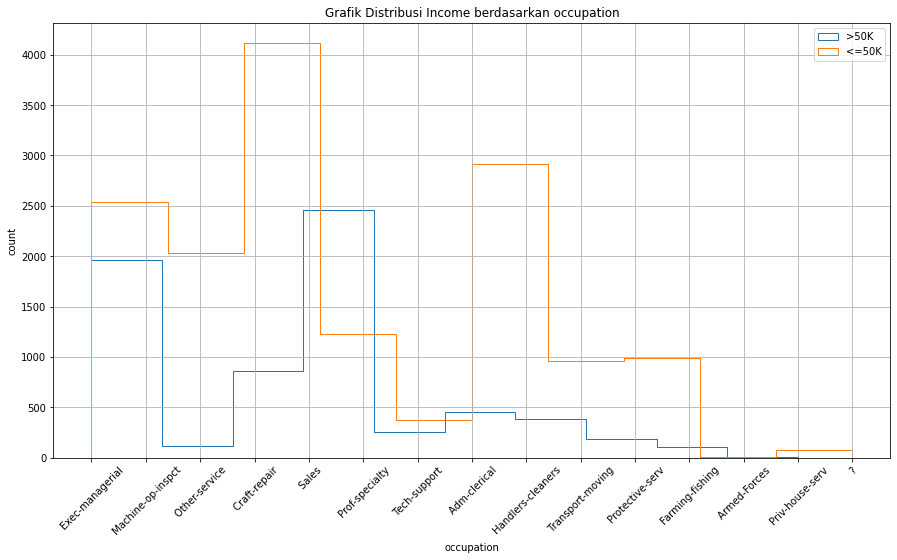

In [28]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(data_copy[data_copy['income_bracket'] == ' >50K'].occupation,
         histtype='step', label='>50K')
axes.hist(data_copy[data_copy['income_bracket'] == ' <=50K'].occupation,
         histtype='step', label='<=50K')
axes.set_title('Grafik Distribusi Income berdasarkan occupation')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('occupation')
axes.tick_params(axis='x', labelrotation = 45)
axes.grid()

Berdasarkan grafik:
- distribusi data untuk kolom occupation cukup merata.
- occupation 'Armed-Forces' memiliki kemungkinan income >50K lebih tinggi.
- occupation 'Farming-Fishing' memiliki income <=50K lebih tinggi.

Chi-Square occupation

Kolom native_num memiliki data null sehingga tidak dapat ditest menggunakan perhitungan chi-square.

conclusion : occupation dimasukkan ke model karena memiliki pattern yang menarik di setiap kelasnya.

### 4.3.9. Melihat korelasi income dan relationship

grafik korelasi

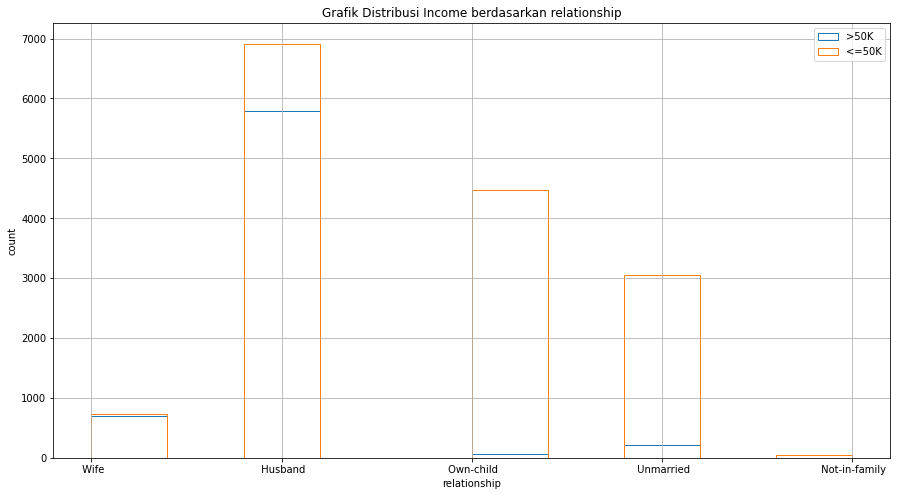

In [29]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['income_bracket'] == ' >50K'].relationship,
         histtype='step', label='>50K')
axes.hist(df_new[df_new['income_bracket'] == ' <=50K'].relationship,
         histtype='step', label='<=50K')
axes.set_title('Grafik Distribusi Income berdasarkan relationship')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('relationship')
axes.grid()

Berdasarkan grafik:
- relationship status 'Wife' memiliki kemungkinan yang sama antara income >50K dan <=50K
- relationship status 'Husband' memiliki sebaran data paling tinggi daripada relationship status lainnya.
- kemungkinan income >50K paling besar adalah jika orang tersebut memiliki status relationship sebagai 'Husband'

Chi-Square relationship

In [30]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['income_bracket'],
                            df_new['relationship'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['income_bracket'].unique()
columns = data['relationship'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 4265.36958158591  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 4265.36958158591  and critical value is: 9.487729036781154
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara income dengan relationship. conclusion : relationship dimasukkan sebagai fitur ke model ML

### 4.3.10. Melihat korelasi income dan race

grafik korelasi

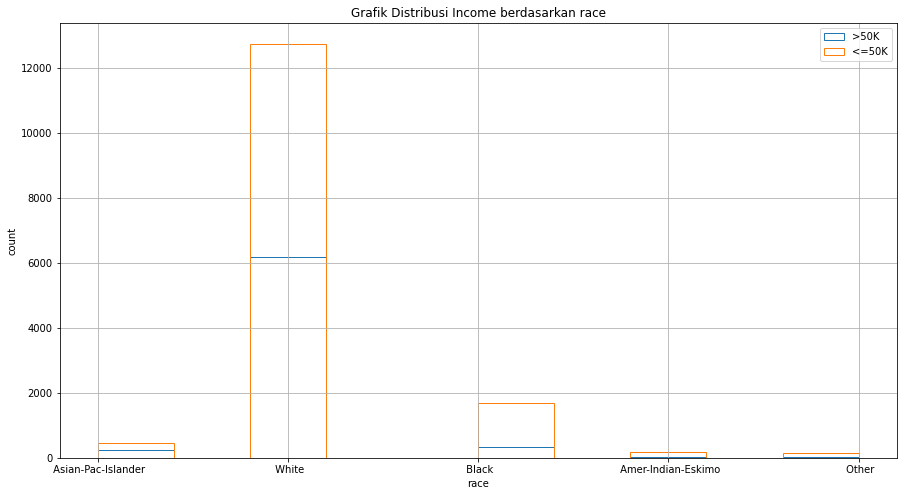

In [31]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['income_bracket'] == ' >50K'].race,
         histtype='step', label='>50K')
axes.hist(df_new[df_new['income_bracket'] == ' <=50K'].race,
         histtype='step', label='<=50K')
axes.set_title('Grafik Distribusi Income berdasarkan race')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('race')
axes.grid()

Berdasarkan grafik:
- race 'White' mendominasi data. Wajar saja karena sensus dilakukan di USA.
- perbandingan antara income dan race num cukup rata jadi kalau dilihat dari grafik, hubungan antara keduanya kurang kuat. Namun ini baru asumsi, akan dikaji lebih dalam melalui chi-square test.

Chi-Square race

In [32]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['income_bracket'],
                            df_new['race'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['income_bracket'].unique()
columns = data['race'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 294.6871730581622  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 294.6871730581622  and critical value is: 9.487729036781154
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara income dengan race. Akan tetapi, jika dilihat dari grafik histogram, saya tidak yakin bahwa race memiliki pengaruh yang signifikan/valid terhadap prediksi income. conclusion : race tidak dimasukkan sebagai fitur ke model ML

### 4.3.11. Melihat korelasi income dan sex

grafik korelasi

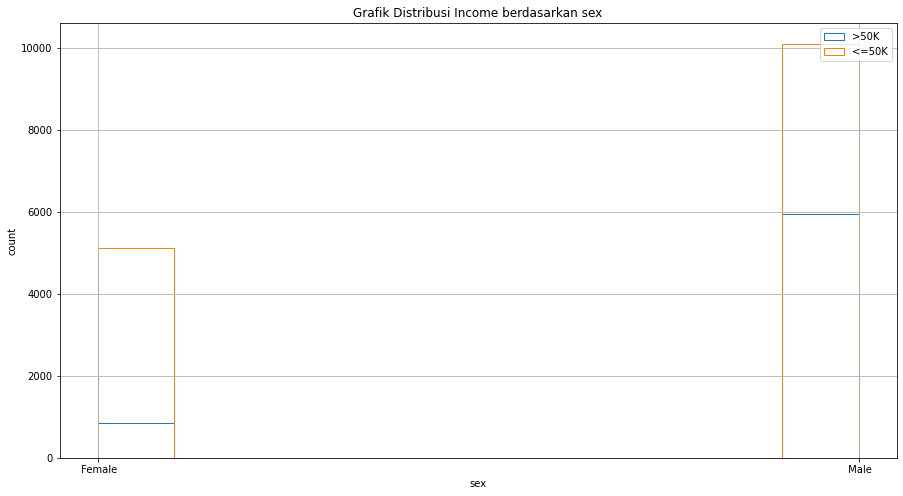

In [33]:
fig, axes = plt.subplots(ncols=1,figsize=(15,8))
axes.hist(df_new[df_new['income_bracket'] == ' >50K'].sex,
         histtype='step', label='>50K')
axes.hist(df_new[df_new['income_bracket'] == ' <=50K'].sex,
         histtype='step', label='<=50K')
axes.set_title('Grafik Distribusi Income berdasarkan sex')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('sex')
axes.grid()

Berdasarkan grafik:
- sebagian besar data ini adalah orang-orang dengan gender 'Male'. Hal ini sesuai dengan analisis seblumnya dimana relationship paling banyak adalah 'Husband'.
- orang-orang dengan gender Male otonatis memiliki peluang income >50K lebih tinggi.

Chi-Square sex

In [34]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['income_bracket'],
                            df_new['sex'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = data['income_bracket'].unique()
columns = data['sex'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1072.5868497460665  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1072.5868497460665  and critical value is: 3.841458820694124
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara income dengan sex. conclusion : sex dimasukkan sebagai fitur ke model ML

### 4.3.12. Melihat korelasi income dan native

grafik korelasi

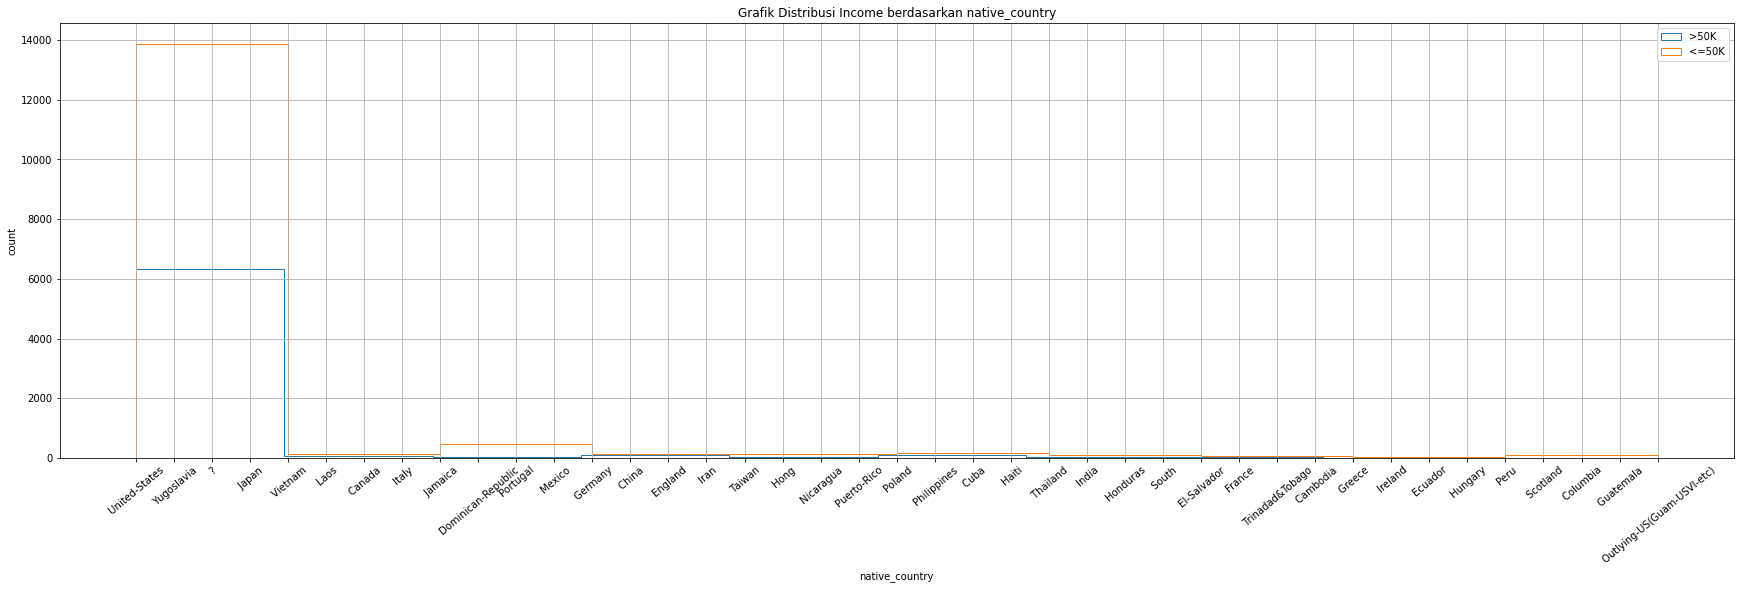

In [35]:
fig, axes = plt.subplots(ncols=1,figsize=(30,8))
axes.hist(data_copy[data_copy['income_bracket'] == ' >50K'].native_country,
         histtype='step', label='>50K')
axes.hist(data_copy[data_copy['income_bracket'] == ' <=50K'].native_country,
         histtype='step', label='<=50K')
axes.set_title('Grafik Distribusi Income berdasarkan native_country')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('native_country')
axes.tick_params(axis='x', labelrotation = 40)
axes.grid()

berdasarkan grafik, persebaran data terbanyak adalah dari USA karena memang ini merupakan sensus di USA. menurut saya, kolom ini kurang berkorelasi terhadap income jadi tidak akan saya sertakan dalam pemodelan.

Chi-Square native

Kolom native_num memiliki data null sehingga tidak dapat ditest menggunakan perhitungan chi-square.

Jika dilihat dari grafik histogram, saya tidak yakin bahwa native country memiliki pengaruh yang signifikan/valid terhadap prediksi income. conclusion : native country tidak masuk dalam pemodelan.

### fitur yang masuk dalam pemodelan :

age, education, hours_per_week, occupation, relationship, dan sex

## 4.2. Melihat statistik kolom numerik

In [36]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
age,21989.0,38.867206,12.989277,17.0,29.0,38.0,48.0,90.0
capital_gain,21989.0,1266.510755,8182.231491,0.0,0.0,0.0,0.0,99999.0
capital_loss,21989.0,94.837237,417.188165,0.0,0.0,0.0,0.0,3900.0
hours_per_week,21989.0,41.025376,12.245465,1.0,40.0,40.0,45.0,99.0


In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21989 entries, 0 to 21988
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             21989 non-null  int64 
 1   workclass       21989 non-null  object
 2   education       21989 non-null  object
 3   marital_status  21989 non-null  object
 4   occupation      21983 non-null  object
 5   relationship    21989 non-null  object
 6   race            21989 non-null  object
 7   sex             21989 non-null  object
 8   capital_gain    21989 non-null  int64 
 9   capital_loss    21989 non-null  int64 
 10  hours_per_week  21989 non-null  int64 
 11  native_country  21599 non-null  object
 12  income_bracket  21989 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.2+ MB


# V. Data Preprocessing

## 5.1. Drop kolom yang tidak dipakai untuk pemodelan

In [38]:
df_new.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K


In [39]:
df_new.drop(columns=['capital_gain','capital_loss','workclass','marital_status', 'race', 'native_country'], inplace=True)
df_new.head()

,age,education,occupation,relationship,sex,hours_per_week,income_bracket
0,39,9th,Other-service,Wife,Female,34,<=50K
1,72,9th,Exec-managerial,Wife,Female,48,>50K
2,45,9th,Machine-op-inspct,Wife,Female,40,>50K
3,31,9th,Exec-managerial,Wife,Female,40,<=50K
4,55,9th,Tech-support,Wife,Female,23,<=50K


## 5.2. Get data for model inference

In [40]:
# Get data for model inference.
# Data inference tidak boleh ada di train dan test. jadi datanya tuh dibagi buat 3 peruntukan.

data_inf = df_new.sample(10, random_state=9)   # ambil 10 sampel, random state gunanya untuk biar ga berubah2, nilainya 17. Nilainya terserah gada pengaruhnya
data_inf

,age,education,occupation,relationship,sex,hours_per_week,income_bracket
13367,60,Some-college,Exec-managerial,Husband,Male,50,<=50K
507,36,HS-grad,Adm-clerical,Wife,Female,40,>50K
16029,19,HS-grad,Sales,Own-child,Male,20,<=50K
2924,81,HS-grad,Exec-managerial,Husband,Male,30,<=50K
4442,51,HS-grad,Tech-support,Husband,Male,40,>50K
12112,49,Some-college,Sales,Husband,Male,60,<=50K
17055,23,Bachelors,Exec-managerial,Own-child,Male,30,<=50K
9165,48,Bachelors,Exec-managerial,Husband,Male,60,>50K
21615,23,Some-college,Other-service,Unmarried,Female,25,<=50K
4565,56,HS-grad,Exec-managerial,Husband,Male,40,<=50K


In [41]:
# Remove inference-set

data_train_test = df_new.drop(data_inf.index)
data_train_test.head()

,age,education,occupation,relationship,sex,hours_per_week,income_bracket
0,39,9th,Other-service,Wife,Female,34,<=50K
1,72,9th,Exec-managerial,Wife,Female,48,>50K
2,45,9th,Machine-op-inspct,Wife,Female,40,>50K
3,31,9th,Exec-managerial,Wife,Female,40,<=50K
4,55,9th,Tech-support,Wife,Female,23,<=50K


In [42]:
# Reset index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_train_test.head()

,age,education,occupation,relationship,sex,hours_per_week,income_bracket
0,39,9th,Other-service,Wife,Female,34,<=50K
1,72,9th,Exec-managerial,Wife,Female,48,>50K
2,45,9th,Machine-op-inspct,Wife,Female,40,>50K
3,31,9th,Exec-managerial,Wife,Female,40,<=50K
4,55,9th,Tech-support,Wife,Female,23,<=50K


## 5.2. Splitting Dataset

In [43]:
# Split between 'X' (features) and 'y' (target)
X = data_train_test.drop('income_bracket', axis = 1)
y = data_train_test['income_bracket']
X.head()

,age,education,occupation,relationship,sex,hours_per_week
0,39,9th,Other-service,Wife,Female,34
1,72,9th,Exec-managerial,Wife,Female,48
2,45,9th,Machine-op-inspct,Wife,Female,40
3,31,9th,Exec-managerial,Wife,Female,40
4,55,9th,Tech-support,Wife,Female,23


In [44]:
# Split between train-set and test-set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17) # sebanyak 20% data jadi data test, 80% train

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (17583, 6)
Test Size :  (4396, 6)


## 5.3. Outlier Handling

Saya akan handling outlier untuk kolom numerikal yaitu kolom `age` dan `hours_per_week`

### 5.3.1. Outlier Detection

Checking normality of the data distribution

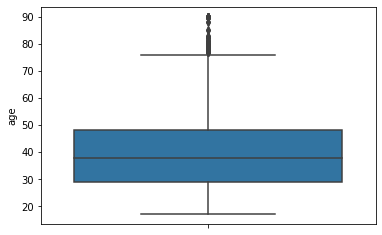

In [45]:
sns.boxplot(y=X_train['age'])

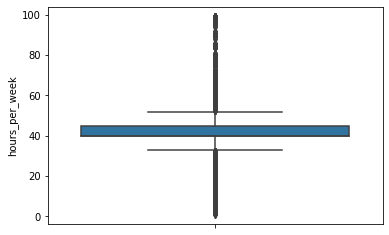

In [46]:
sns.boxplot(y=X_train['hours_per_week'])

In [47]:
X_train['age'].skew()

0.4242245556493057

In [48]:
X_train['hours_per_week'].skew()

0.3166323405177078

data yang skew adalah data dengan skewness <-0.5 dan >0.5 dan akan dideteksi outliernya dengan metode IQR. Data yang tidak skew dideteksi dengan metode std.

kolom `age` dan kolom `hours_per_week` memiliki skewness < 0.5 sehingga kolom ini berdistribusi normal.

Outliers Detection - std

In [49]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

Outlier detection - std : age

In [50]:
upper_age, lower_age = find_normal_boundaries(X_train, 'age')
upper_age, lower_age

(77.73684433239056, -0.07944798364461292)

In [51]:
print('Total data: {}'.format(len(X_train)))
print('Data with price bigger than 77.73   : {}'.format(len([X_train['age'] > upper_age])))
print('')
print('% data with price bigger than 77.73 : {}'.format(len([X_train['age'] > upper_age])/len(X_train) * 100))

Total data: 17583
Data with price bigger than 77.73   : 1

% data with price bigger than 77.73 : 0.0056873116078029915


Outlier detection - std : hours per week

In [52]:
upper_hpw, lower_hpw = find_normal_boundaries(X_train, 'hours_per_week')
upper_hpw, lower_hpw

(77.5975336085033, 4.517691324670793)

In [53]:
print('Total data: {}'.format(len(X_train)))
print('Data with hours_per_week bigger than 77.597   : {}'.format(len([X_train['hours_per_week'] > upper_hpw])))
print('% data with hours_per_week bigger than 77.597 : {}'.format(len([X_train['hours_per_week'] > upper_hpw])/len(X_train) * 100))
print('')
print('Data with hours_per_week lower than 4.51   : {}'.format(len([X_train['hours_per_week'] < lower_hpw])))
print('% data with hours_per_week lower than 4.51 : {}'.format(len([X_train['hours_per_week'] < lower_hpw])/len(X_train) * 100))

Total data: 17583
Data with hours_per_week bigger than 77.597   : 1
% data with hours_per_week bigger than 77.597 : 0.0056873116078029915

Data with hours_per_week lower than 4.51   : 1
% data with hours_per_week lower than 4.51 : 0.0056873116078029915


Ternyata untuk kolom `age` dan `hours_per_week` hanya ada kurang dari 1% outlier dari keseluruhan data train. Maka saya akan lakukan metode trimming untuk handling outliers.

### 5.3.2. Outliers Handling - Trimming

Trimming kolom `age`

In [54]:
# mengecek count, min, dan max data X_train awal
X_train['age'].describe()

count    17583.000000
mean        38.828698
std         12.969382
min         17.000000
25%         29.000000
50%         38.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

data awal X_train
- banyak data : 17583
- nilai minimal ['age']: 17
- nilai maksimal ['age'] : 90

In [55]:
# drop data X_train berdasarkan index yang memenuhi syarat outlier
index1 = X_train[(X_train['age'] > upper_age)].index
X_train.drop(index1, inplace=True)

# mengecek count, min, dan max data X_train setelah di trimming 1
X_train['age'].describe()

count    17525.000000
mean        38.678231
std         12.720577
min         17.000000
25%         29.000000
50%         38.000000
75%         47.000000
max         77.000000
Name: age, dtype: float64

data X_train trimming I
- banyak data : 17525
- nilai minimal ['age'] : 17
- nilai maksimal ['age'] : 77

In [56]:
# mengecek count awal y_train
print(y_train.value_counts())

 <=50K    12140
 >50K      5443
Name: income_bracket, dtype: int64


data awal y_train
- banyak data : 12140 + 5443 = 17583

In [57]:
# drop data y_train berdasarkan index yang memenuhi syarat outlier
y_train.drop(index1, inplace=True)

# mengecek count y_train setelah di trimming 1
y_train.value_counts()

 <=50K    12097
 >50K      5428
Name: income_bracket, dtype: int64

data y_train setelah trimming I
- banyak data : 12097 + 5428 = 17525

Trimming kolom `hours_per_week`

In [58]:
# mengecek count, min, dan max data X_train setelah trimming 1
X_train['hours_per_week'].describe()

count    17525.000000
mean        41.084508
std         12.152064
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

data X_train sebelum trimming II 
- banyak data : 17525
- nilai minimal ['hours_per_week'] : 1
- nilai maksimal ['hours_per_week'] : 99

In [59]:
# drop data X_train berdasarkan index yang memenuhi syarat outlier
index2 = X_train[(X_train['hours_per_week'] > upper_hpw)|(X_train['hours_per_week'] < lower_hpw)].index
X_train.drop(index2, inplace=True)

# mengecek count, min, dan max data X_train setelah di trimming 2
X_train['hours_per_week'].describe()

count    17289.000000
mean        40.660015
std         11.000099
min          5.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         77.000000
Name: hours_per_week, dtype: float64

data X_train setelah trimming II 
- banyak data : 17289
- nilai minimal ['hours_per_week] : 5
- nilai maksimal ['hours_per_week] : 77

In [60]:
# mengecek count awal y_train
print(y_train.value_counts())

 <=50K    12097
 >50K      5428
Name: income_bracket, dtype: int64


data y_train sebelum trimming II 
- banyak data : 12097 + 5428 = 17525

In [61]:
# drop data y_train berdasarkan index yang memenuhi syarat outlier
y_train.drop(index2, inplace=True)

# mengecek count y_train setelah di trimming 2
y_train.value_counts()

 <=50K    11944
 >50K      5345
Name: income_bracket, dtype: int64

data y_train setelah trimming II 
- banyak data : 11944 + 5345 = 17289

In [62]:
# menghitung persentase data yang dilakukan trimming
# (data awal -  data trimming) / data awal * 100
(17583 - 17289) / 17583 * 100

1.6720696126940795

## 5.4. Handling Missing Value

### 5.4.1. Check Missing Values

In [63]:
X_train.isna().sum()

age               0
education         0
occupation        4
relationship      0
sex               0
hours_per_week    0
dtype: int64

In [64]:
X_train.shape

(17289, 6)

In [65]:
# menghitung persentase missing values price di X_train
4/17284*100

0.023142791020597086

In [66]:
X_test.isna().sum()

age               0
education         0
occupation        2
relationship      0
sex               0
hours_per_week    0
dtype: int64

In [67]:
y_train.isna().sum()

0

In [68]:
y_test.isna().sum()

0

### 5.4.2. Missing Values Handling - Mode Imputation

Ternyata ada sebanyak 0.028% missing values di kolom occupaton dari data X_train. Dari analisis saya, missing values kolom tersebut independen dan termasuk jenis MCAR. Karena data tersebut adalah categorical dan karena missing values < 5%, maka akan dilakukan handling missing values dengan metode mode imputation.

In [69]:
X_train['occupation'].mode()

0     Craft-repair
dtype: object

Mode dari kolom occupation di X_train adalah ' Craft-repair' dengan label '12'. Maka untuk imputasi mode digunakan angka 12.

In [70]:
X_train['occupation'].fillna(value=' Craft-repair', inplace=True)
X_test['occupation'].fillna(value=' Craft-repair', inplace=True)

In [71]:
X_train['occupation'].isna().sum()

0

In [72]:
X_test['occupation'].isna().sum()

0

In [73]:
X_train.head()

,age,education,occupation,relationship,sex,hours_per_week
7582,49,Masters,Prof-specialty,Husband,Male,50
10636,47,Bachelors,Machine-op-inspct,Husband,Male,44
11315,46,Assoc-acdm,Exec-managerial,Husband,Male,40
8938,38,Bachelors,Prof-specialty,Husband,Male,50
17284,21,Some-college,Other-service,Own-child,Male,10


## 5.5. Feature Selection

In [74]:
# Get numerical columns and categorical columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical columns : ', num_columns)
print('Categorical columns : ', cat_columns)

Numerical columns :  ['age', 'hours_per_week']
Categorical columns :  ['education', 'occupation', 'relationship', 'sex']


In [75]:
# Split Train-set and Test-set based on column types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## 5.6. Feature Scaling

Karena datanya terdistribusi normal, saya akan menggunakan MinMaxScaler. Algoritma ini memiliki kelebihan mempertahankan distribusi data. Saya akan mengatur range nya dari 0 s/d 1 untuk memudahkan pemahaman data.

In [76]:
# Feature scaling using MinMaxScaler, defaultnya jadi range 0 s/d 1

scaler = MinMaxScaler()
scaler.fit(X_train_num) # .fit hanya milik train

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.53333333, 0.625     ],
       [0.5       , 0.54166667],
       [0.48333333, 0.48611111],
       ...,
       [0.23333333, 0.55555556],
       [0.45      , 0.34722222],
       [0.1       , 0.48611111]])

## 5.7. Feature Encoding

Karena datanya terdistribusi normal, saya akan menggunakan OrdinalEncoder.

In [77]:
# feature Encoding using OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[12.,  9.,  0.,  1.],
       [ 9.,  6.,  0.,  1.],
       [ 7.,  3.,  0.,  1.],
       ...,
       [ 9.,  3.,  0.,  1.],
       [11.,  5.,  4.,  0.],
       [ 1.,  5.,  0.,  1.]])

## 5.8. Merge/Concat between scaled num columns and encoded cat columns

In [78]:
# Concat columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final

array([[ 0.53333333,  0.625     , 12.        ,  9.        ,  0.        ,
         1.        ],
       [ 0.5       ,  0.54166667,  9.        ,  6.        ,  0.        ,
         1.        ],
       [ 0.48333333,  0.48611111,  7.        ,  3.        ,  0.        ,
         1.        ],
       ...,
       [ 0.23333333,  0.55555556,  9.        ,  3.        ,  0.        ,
         1.        ],
       [ 0.45      ,  0.34722222, 11.        ,  5.        ,  4.        ,
         0.        ],
       [ 0.1       ,  0.48611111,  1.        ,  5.        ,  0.        ,
         1.        ]])

In [79]:
# Display as DataFrame

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns+cat_columns])
X_train_final_df.head()

,age,hours_per_week,education,occupation,relationship,sex
0,0.533333,0.625000,12.0,9.0,0.0,1.0
1,0.500000,0.541667,9.0,6.0,0.0,1.0
2,0.483333,0.486111,7.0,3.0,0.0,1.0
3,0.350000,0.625000,9.0,9.0,0.0,1.0
4,0.066667,0.069444,15.0,7.0,2.0,1.0


# VI. Model Definition

Data yang digunakan adalah data categorical. Model yang digunakan adalah LogisticRegression dan SVM.

## 6.1. LogisticRegression

Saya akan mencari model terbaik dari LogisticRegression dengan hyperparameter tuning menggunakan GridSearchCV. 

In [80]:
log_model = LogisticRegression()
parameters_log = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'C':[0.1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
              }

grid_log = GridSearchCV(estimator=log_model, param_grid=parameters_log, scoring='accuracy',cv=5, verbose=1, n_jobs=-1)
grid_log.fit(X_train_final_df,y_train)
grid_log.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

{'C': 10, 'penalty': 'l2', 'solver': 'sag'}

Hyperparameter terbaik untuk model LogisticRegression :
- C = 10
- penalty = 'l2'
- solver = 'sag'

In [99]:
best_log_model = LogisticRegression(C=10, penalty='l2', solver='sag')
best_log_model.fit(X_train_final_df,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(C=10, solver='sag')

In [100]:
best_log_model.coef_

array([[ 2.57139149,  3.21184333,  0.0593532 ,  0.02245773, -0.31375262,
         0.07363988]])

In [101]:
X_train_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17289 entries, 0 to 17288
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (age,)             17289 non-null  float64
 1   (hours_per_week,)  17289 non-null  float64
 2   (education,)       17289 non-null  float64
 3   (occupation,)      17289 non-null  float64
 4   (relationship,)    17289 non-null  float64
 5   (sex,)             17289 non-null  float64
dtypes: float64(6)
memory usage: 810.5 KB


masing-masing koefisien menggambarkan pembobotan dari setiap fitur (kolom di X set) yang nantinya dapat ditarik kesimpulan prediksinya.

## 6.2. SVM

Seharusnya terlebih dahulu dilakukan pencarian hyperparameter terbaik dengan tuning. Akan tetapi, prosesing model SVM memakan waktu yang cukup lama sehingga saya akan setting parameternya berdasarkan asumsi saya. Kernel yang dipilih adalah rbf agar hyperplane lebih fleksibel dalam mengklasifikasikan model sehingga harapannya didapatkan akurasi model yang lebih baik.

In [84]:
#svc_model = SVC()
#parameters_svc = {'C':[0.1, 10, 100],
#                  'gamma':[0.1, 1, 10, 100],
#              'kernel': ['rbf']
#              }

#grid_svc = GridSearchCV(estimator=svc_model, param_grid=parameters_svc, scoring='accuracy',cv=3, verbose=1, n_jobs=-1)
#grid_svc.fit(X_train_final_df,y_train)
#grid_svc.best_params_

In [102]:
svc_model = SVC(C=1,gamma=1, kernel = 'rbf')
svc_model.fit(X_train_final_df,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


SVC(C=1, gamma=1)

# VII. Model Evaluation

In [103]:
print('Classification Report Logistic Regression\n',classification_report(y_test, best_log_model.predict(X_test_final)))
print('\nClassification Report SVC-RBF\n', classification_report(y_test, best_log_model.predict(X_test_final)))

Classification Report Logistic Regression
               precision    recall  f1-score   support

       <=50K       0.76      0.88      0.82      3063
        >50K       0.57      0.37      0.45      1333

    accuracy                           0.72      4396
   macro avg       0.67      0.63      0.63      4396
weighted avg       0.70      0.72      0.71      4396


Classification Report SVC-RBF
               precision    recall  f1-score   support

       <=50K       0.76      0.88      0.82      3063
        >50K       0.57      0.37      0.45      1333

    accuracy                           0.72      4396
   macro avg       0.67      0.63      0.63      4396
weighted avg       0.70      0.72      0.71      4396



**Model Logistic Regression**
- dari seluruh data yang terprediksi <=50K, ada 0.76 data yang benar-benar <=50K
- dari seluruh data aktual <=50K, terdapat 0.88 data yang terprediksi <=50K
- terdapat 82% data terprediksi <=50K yang benar.


- dari seluruh data yang terprediksi >50K, ada 0.57 data yang benar-benar >50K
- dari seluruh data aktual >50K, terdapat 0.37 data yang terprediksi >50K
- terdapat 45% data terprediksi >50K yang benar.

- Akurasi model : 72%

**Model SVM-SVC**
- dari seluruh data yang terprediksi <=50K, ada 0.76 data yang benar-benar <=50K
- dari seluruh data aktual <=50K, terdapat 0.88 data yang terprediksi <=50K
- terdapat 82% data terprediksi <=50K yang benar.


- dari seluruh data yang terprediksi >50K, ada 0.57 data yang benar-benar >50K
- dari seluruh data aktual >50K, terdapat 0.37 data yang terprediksi >50K
- terdapat 45% data terprediksi >50K yang benar.
- Akurasi model : 72%

**overall analysis on model evaluation :**
metrics evaluasi model logistic regression dan svm-svc menghasilkan angka yang mirip. Kedua model menghasilkan nilai F1-score yang berbeda jauh antara kategori income >50K dan <=50K. Hal ini terjadi karena adanya imbalance pada data dimana data dengan income <=50K jauh lebih banyak daripada data dengan income >50K.

# VIII. Model Inference

## 8.1. Model Saving

model yang telah disimpan akan diterapkan pada data inference

In [104]:
# Model Saving

with open('model_scaler.pkl', 'wb') as file_1:  # nama file, wb write binary, as aliasnya
  pickle.dump(scaler, file_1)  # masukin yang fit dan aliasnya

with open('model_encoder.pkl', 'wb') as file_2:
  pickle.dump(encoder, file_2)

with open('model_log_reg.pkl', 'wb') as file_3:
  pickle.dump(best_log_model, file_3)

with open('svc_model.pkl', 'wb') as file_4:
  pickle.dump(svc_model, file_4)

In [105]:
# Load All Models

with open('model_scaler.pkl', 'rb') as file_1:
  model_scaler = pickle.load(file_1)

with open('model_encoder.pkl', 'rb') as file_2:
  model_encoder = pickle.load(file_2)

with open('model_log_reg.pkl', 'rb') as file_3:
  model_log_reg = pickle.load(file_3)

with open('svc_model.pkl', 'rb') as file_4:
  svc_model = pickle.load(file_4)

## 8.2. Preprocessing inference data

In [106]:
data_inf.head()

,age,education,occupation,relationship,sex,hours_per_week,income_bracket
0,60,Some-college,Exec-managerial,Husband,Male,50,<=50K
1,36,HS-grad,Adm-clerical,Wife,Female,40,>50K
2,19,HS-grad,Sales,Own-child,Male,20,<=50K
3,81,HS-grad,Exec-managerial,Husband,Male,30,<=50K
4,51,HS-grad,Tech-support,Husband,Male,40,>50K


In [107]:
# Split between num columns and cat columns

data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

data_inf_num

,age,hours_per_week
0,60,50
1,36,40
2,19,20
3,81,30
4,51,40
5,49,60
6,23,30
7,48,60
8,23,25
9,56,40


In [108]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)
data_inf_num_scaled

array([[0.71666667, 0.625     ],
       [0.31666667, 0.48611111],
       [0.03333333, 0.20833333],
       [1.06666667, 0.34722222],
       [0.56666667, 0.48611111],
       [0.53333333, 0.76388889],
       [0.1       , 0.34722222],
       [0.51666667, 0.76388889],
       [0.1       , 0.27777778],
       [0.65      , 0.48611111]])

In [109]:
# Concate

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[ 0.71666667,  0.625     , 15.        ,  3.        ,  0.        ,
         1.        ],
       [ 0.31666667,  0.48611111, 11.        ,  0.        ,  4.        ,
         0.        ],
       [ 0.03333333,  0.20833333, 11.        , 11.        ,  2.        ,
         1.        ],
       [ 1.06666667,  0.34722222, 11.        ,  3.        ,  0.        ,
         1.        ],
       [ 0.56666667,  0.48611111, 11.        , 12.        ,  0.        ,
         1.        ],
       [ 0.53333333,  0.76388889, 15.        , 11.        ,  0.        ,
         1.        ],
       [ 0.1       ,  0.34722222,  9.        ,  3.        ,  2.        ,
         1.        ],
       [ 0.51666667,  0.76388889,  9.        ,  3.        ,  0.        ,
         1.        ],
       [ 0.1       ,  0.27777778, 15.        ,  7.        ,  3.        ,
         0.        ],
       [ 0.65      ,  0.48611111, 11.        ,  3.        ,  0.        ,
         1.        ]])

## 8.3. Inference logistic regression

In [110]:
# Predict Data Inference

y_pred_inf = model_log_reg.predict(data_inf_final)
y_pred_inf

array([' >50K', ' <=50K', ' <=50K', ' >50K', ' >50K', ' >50K', ' <=50K',
       ' >50K', ' <=50K', ' >50K'], dtype=object)

In [111]:
# Convert into DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Income - Prediction'])
y_pred_inf_df

,Income - Prediction
0,>50K
1,<=50K
2,<=50K
3,>50K
4,>50K
5,>50K
6,<=50K
7,>50K
8,<=50K
9,>50K


## 8.4. Inference svc

In [112]:
y_pred_inf_svc = model_log_reg.predict(data_inf_final)
y_pred_inf_svc

array([' >50K', ' <=50K', ' <=50K', ' >50K', ' >50K', ' >50K', ' <=50K',
       ' >50K', ' <=50K', ' >50K'], dtype=object)

In [113]:
# Convert into DataFrame

y_pred_inf_svc_df = pd.DataFrame(y_pred_inf_svc, columns=['Income - Prediction'])
y_pred_inf_svc_df

,Income - Prediction
0,>50K
1,<=50K
2,<=50K
3,>50K
4,>50K
5,>50K
6,<=50K
7,>50K
8,<=50K
9,>50K


hasil prediksi data inference dari kedua model sama persis

# IX. Kesimpulan

**Metrics Model**
- metrics evaluasi model logistic regression dan svm-svc menghasilkan angka yang mirip, salah satunya metrics akurasi dengan angka 71% untuk kedua model.


**Analisis kedua model**
- model Logistic Regression memiliki kelebihan pemrosesan yang cepat dibandingkan SVM.
- model SVM-SVC memiliki kelebihan dapat memprediksi lebih dari 2 kategori dengan baik dibandingkan dengan model Logistic Regression.
- Sebenarnya, model logistic regression lebih sensitif terhadap overfitting daripada model SVM-SVC. Akan tetapi karena adanya imbalancy data, kelemahan tersebut seperti tidak terlihat karena hasil metrics f1-score antara kedua model sangat mirip.


**Improvement Suggestion**
- Improvement yang dapat diterapkan untuk machine learning ini adalah adanya handling imbalance data.


**Insight setelah proses EDA dan selanjutnya**
- dari analisis grafik, chi-square test, dan personal judgement di EDA, kolom yang terpilih sebagai fitur sudah cukup baik dalam memprediksi data karena akurasinya mencapai 71%.
- setiap proses yang diambil harus dipilih berdasarkan argumen yang kuat. Apabila model dan proses pada dataset ini diaplikasikan pada dataset lain, belum tentu menghasilkan model dengan akurasi yang sama.

# X. Conceptual Problems

In [97]:
# melihat koefisien fitur logistic regression
best_log_model.coef_

array([[ 2.57437875,  3.21817388,  0.05931254,  0.02257031, -0.31369242,
         0.07355192]])

In [98]:
# melihat fitur
X_train_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17289 entries, 0 to 17288
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (age,)             17289 non-null  float64
 1   (hours_per_week,)  17289 non-null  float64
 2   (education,)       17289 non-null  float64
 3   (occupation,)      17289 non-null  float64
 4   (relationship,)    17289 non-null  float64
 5   (sex,)             17289 non-null  float64
dtypes: float64(6)
memory usage: 810.5 KB


1. Apakah yang dimaksud dengan coeficient pada logistic regression?
2. Apakah yang dimaksud dengan Support Vector pada SVM?
3. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

1. koefisien pada logistic regression menggambarkan besarnya bobot pada setiap fitur. Apabila nilainya positif, maka lebih besar kemungkinannya pada tingkat prediktor daripada tingkat referensi. dan begitu pula sebaliknya. koefisien yang bernilai negatif di logistic regression kali ini adalah pada fitur relationship.
2. Support Vector adalah data poin yang berada lebih dekat dengan hyperplane. Support vector mempengaruhi posisi dan orientasi/rotasi dari hyperplane. Support vector dapat memaksimalkan margin. Maka dari itu, support vector dapat menjadi pertimbangan data scientist dalam mebuat model SVM yang maksimal.
3. Kernel pada SVM merupakan suatu metode untuk mentransformasikan data poin dan mengoptimalkan pembatas klasifikasi antar kategori. Kernel sangat berguna pada non-linear model seperti contohnya SVM. salah satu kernelnya adalah RBF (Radial Basis Function). RBF memiliki hyperplane yang lebih fleksibel terhadap data point daripada kernel linear. RBF cocok untuk data yang memiliki persebaran poin yang tidak lugas karena garis hyperplane akan mencari data terluar.support vector dengan lebih fleksibel. 2 hyperparameter paling penting di RBF adalah C dan gamma yang dapat memengaruhi bentuk, posisi, dan orientasi hyperplane.